## 순환 신경망(Recurrent Neural Network, RNN)
#### RNN이란
- 입력과 출력을 시퀀스 단위로 처리하는 모델
- 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로 보내면서 다시 은닉층 노드의 다음 계산의 입력으로 보내짐
- 셀: 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드
    - 이 셀은 이전의 값을 기억하는 메모리 역할을 함
    - "메모리 셀" 또는 "RNN 셀" 이라고 표현
- 은닉 상태: 메모리 셀이 출력층 방향으로 또는 다음 시점의 자신에게 보내는 값
- 입력층 $\rightarrow$ 입력 벡터 | 출력층 $\rightarrow$ 출력 벡터 | 은닉층 $\rightarrow$ 은닉상태
- RNN은 입/출력의 길이를 다르게 설계 가능
    - many $\rightarrow$ one: 감성 분류(문장의 긍,부정 판별)
    - one $\rightarrow$ many: 이미지 캡셔닝(이미지의 제목 선정)
    - many $\rightarrow$ many: 챗봇
- 수식
    - 은닉층: $h_t = tanh(W_xx_t + W_hh_{t-1} + b)$
    - 출력층: $y_t = f(W_yh_t + b)$ ($f$는 비션형 활성화 함수)
    - $h_t$: 은닉층의 메모리 셀 | $W_x$: 입력층의 가중치 | $W_h$: 이전 시점(t-1)의 은닉 상태값인 $h_{t-1}$을 위한 가중치

In [1]:
import torch
import torch.nn as nn

In [2]:
# 입력의 크기
input_size = 5
# 은닉 상태의 크기
hidden_size = 8

배치 크기는 1, 10번의 타임 스텝동안 5차원 벡터의 입력이 들어간다

In [7]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [8]:
inputs

tensor([[[2.4775e+27, 1.3761e-42, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]])

In [10]:
#batch_first=True: 입력 텐서의 첫번째 차원이 배치 크기
cell = nn.RNN(input_size, hidden_size, batch_first=True)

- outputs: 모든 시점의 은닉 상태들
- _status: 마지막 시점의 은닉 상태

In [11]:
outputs, _status = cell(inputs)

In [12]:
outputs, _status

(tensor([[[ 1.0000,  1.0000,  1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000],
          [-0.0760,  0.3033, -0.2364, -0.5345,  0.2366, -0.1530,  0.3590,
            0.0525],
          [-0.0104,  0.2900, -0.2697, -0.2692, -0.5020,  0.0425, -0.0911,
           -0.3678],
          [-0.4268,  0.4527, -0.3291, -0.5490, -0.2738,  0.2414,  0.1481,
           -0.2412],
          [-0.4807,  0.3212, -0.4775, -0.3523, -0.4729,  0.2425,  0.0341,
           -0.2677],
          [-0.5809,  0.4095, -0.4942, -0.4467, -0.4182,  0.3503,  0.1455,
           -0.2023],
          [-0.5843,  0.3696, -0.5413, -0.3805, -0.4656,  0.3509,  0.0822,
           -0.2499],
          [-0.6172,  0.3955, -0.5354, -0.4263, -0.4530,  0.3769,  0.1238,
           -0.2177],
          [-0.6164,  0.3805, -0.5534, -0.3959, -0.4667,  0.3732,  0.1031,
           -0.2327],
          [-0.6243,  0.3908, -0.5494, -0.4128, -0.4617,  0.3834,  0.1171,
           -0.2228]]], grad_fn=<TransposeBackward1>),
 tensor([[[-0.624

In [13]:
outputs.shape

torch.Size([1, 10, 8])

In [14]:
_status.shape

torch.Size([1, 1, 8])

### Deep RNN

In [15]:
inputs = torch.Tensor(1,10,5)

In [16]:
cell = nn.RNN(input_size=5, hidden_size=8, num_layers=2, batch_first=True)
outputs, _status = cell(inputs)

In [17]:
outputs.shape, _status.shape

(torch.Size([1, 10, 8]), torch.Size([2, 1, 8]))

### Bidirectional RNN

- 이전 데이터뿐만 아니라 향후 데이터를 통해 정답을 예측함
- ex) 문장의 빈칸을 예측
- 기본적으로 두 개의 메모리 셀을 이용
- 첫번째 메모리셀은 기존 RNN처럼 앞 시점의 은닉상태를 전달받음
- 두번째 메모리셀은 다음 시점의 은닉상태를 전달받음

In [18]:
inputs = torch.Tensor(1,10,5)

In [19]:
cell = nn.RNN(input_size=5, hidden_size=8, num_layers=2, batch_first=True, bidirectional=True)

In [20]:
outputs, _status = cell(inputs)

In [24]:
outputs.shape 
# (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)

torch.Size([1, 10, 16])

In [25]:
_status.shape
# (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)

torch.Size([4, 1, 8])

## 기본(바닐라) RNN의 한계
- 장기 의존성 문제: 시퀀스가 길수록 앞 시점의 정보들의 영향력이 줄어들다가 거의 없어짐

## LSTM(Long Short-Term Memory)
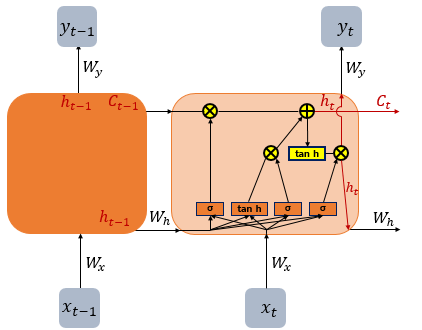
- LSTM은 장기 의존성 문제를 해결하기 위해 입력, 망각, 출력 게이트를 도입

#### 1. 셀 상태(cell state)
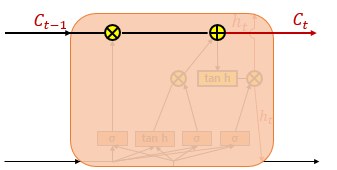
- 은닉 상태(hidden state)와 같이 이전 시점의 셀 상태를 다음 시점으로 넘김
- 3개의 게이트들과 함께 작용하여 정보를 선택적으로 활용

#### 2. 입력 게이트
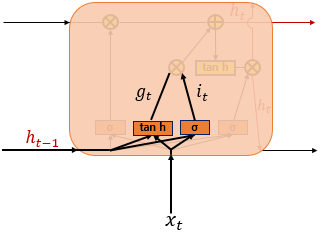
- 현재 정보를 기억하기 위한 게이트
- $i_t = \sigma(W_{xi}x_t + W_{hi}h_{t-1} + b_i)$
- $g_t = tanh(W_{xi}x_t + W_{hg}h_{t-1} + b_g)$
- 0~1사이의 $i_t$와 -1~1사이의 $g_t$를 가지고 이번에 선택된 기억할 정보의 양을 정함

#### 3. 삭제 게이트
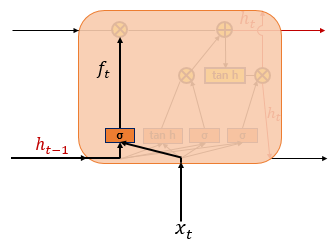
- 기억을 삭제하기 위한 게이트
- $f_t = \sigma(W_{xf}x_t + W_{hf}h_{t-1} + b_f)$
- 시그모이드의 결과로 0~1사이의 값이 나오고 현재 문장과 이전 문장이 합쳐진 후 중요도를 결정

#### 4. 셀 상태(장기 상태)
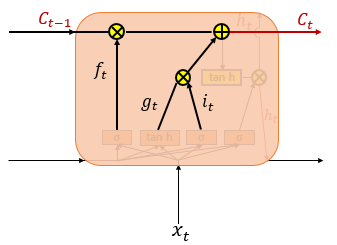
- $C_t = f_t \circ C_{t-1} + i_t \circ g_t$($\circ$는 원소곱)
- $C_t$를 장기 상태라고 부름
- $i_t \circ g_t$로 기억할 데이터를 선택
- 선택된 기억을 삭제 게이트의 결과에 더함
- 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미
- 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 의미

#### 5. 출력 게이트와 은닉 상태(단기 상태)
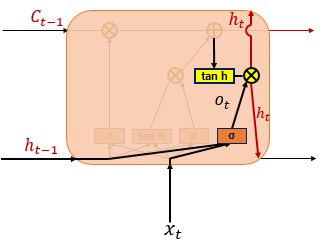
- $o_t = \sigma(W_{xo}x_t + W_{ho}h_{t-1} + b_o)$
- $h_t = o_t \circ tanh(c_t)$
- 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지닌 값
- t의 은닉 상태를 결정하는 일에 쓰임


In [26]:
## LSTM 사용법
import torch.nn as nn

nn.RNN(input_size, hidden_size, batch_first=True)
nn.LSTM(input_size, hidden_size, batch_first=True)

LSTM(5, 8, batch_first=True)

## GRU(Gated Recurrent Unit)

#### LSTM과 GRU의 차이
- LSTM은 게이트 3개(입력, 출력, 삭제), GRU는 2개(업데이트, 리셋)

### GRU 구조
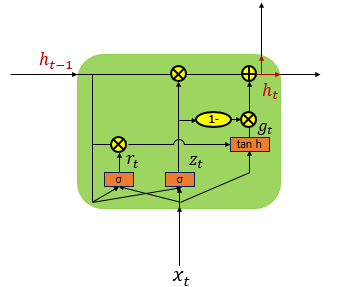

#### 1. 리셋 게이트
- $r_t = \sigma(W_{xr}x_t + W_{hr}h_{t-1} + b_r)$
- $g_t = tanh(W_{hg}(r_t \circ h_{t-1}) + W_{xg}x_t + b_g)$
- 시그모이드로 나온 값을 다시 $g_t$식에 넣음

#### 2. 업데이트 게이트
- $z_t = \sigma(W_{xz}x_t + W_{hz}h_{t-1} + b_z)$
- $h_t = (1 - z_t) \circ g_t + z_t \circ h_{t-1}$
- 과거와 현재의 정보의 비율을 결정함($1-z_t$와 $z_t$)

